### Calcular el número de 1-pixeles

In [12]:
import plotly.graph_objects as go
import cv2

names = ['apple-1.png','bird-1.png', 'children-1.png', 'cup-1.png', 'device3-1.png', 
         'device4-1.png', 'Heart-1.png', 'personal_car-1.png', 'ray-1.png', 'sea_snake-1.png']

images = []
n_pixels = []
 
# Cargar y guardar las imagenes binarias
for name in names:
    fullName = 'images/' + name
    images.append(cv2.imread(fullName, cv2.IMREAD_GRAYSCALE))

# Contar los píxeles con valor de 1
for image in images:
    n_pixels.append(cv2.countNonZero(image))
    

# for i in range(len(n_pixels)):
#     print(names[i],' - ',n_pixels[i])

fig = go.Figure(data=[go.Table(header=dict(values=['Imagen', 'Cantidad de 1-píxeles'], line_color='darkslategray',
                fill_color='gray', font=dict(color='white', size=12)),
                 cells=dict(values=[names, n_pixels], line_color='darkslategray',
                fill_color='lightgray', font=dict(color='black', size=12)))])
fig.show()


### Transformaciones de escala

In [13]:
import numpy as np

proporciones = []
escalados = []
coordenadas = []
objetos_escalados = []
imagenes_escaladas = []

for i in range(0,len(n_pixels)):
    proporciones.append(round((n_pixels[2]/n_pixels[i]),2))

# print(sum(proporciones)/len(proporciones))

fig = go.Figure(data=[go.Table(header=dict(values=['Imagen', 'Factor alfa'], line_color='darkslategray',
                fill_color='gray', font=dict(color='white', size=12)),
                 cells=dict(values=[names, proporciones], line_color='darkslategray',
                fill_color='lightgray', font=dict(color='black', size=12)))])
fig.show()
for i in range(len(n_pixels)):
    if i != 2:
        escalados.append(round((n_pixels[i]*proporciones[i]),2))
    else:
        escalados.append(n_pixels[i])

fig = go.Figure(data=[go.Table(header=dict(values=['Imagen', 'Cantidad de 1-pixeles escalado'], line_color='darkslategray',
                fill_color='gray', font=dict(color='white', size=12)),
                 cells=dict(values=[names, escalados], line_color='darkslategray',
                fill_color='lightgray', font=dict(color='black', size=12)))])
fig.show()


# encontrar el rectángulo delimitador del objeto
for i in range(len(images)):
    x,y,w,h = cv2.boundingRect(images[i])
    xmin, ymin = x, y
    xmax, ymax = x + w, y + h
    coordenadas.append([ [xmin,ymin], [xmax, ymax] ])


for i in range(len(images)):
    if i != 2:
        objetos_escalados.append(cv2.resize(images[i][coordenadas[i][0][0]:coordenadas[i][1][0], coordenadas[i][0][1]:coordenadas[i][1][1]],None,fx=proporciones[i], fy=proporciones[i], interpolation=cv2.INTER_NEAREST))
    else:
        objetos_escalados.append(cv2.resize(images[i][coordenadas[i][0][0]:coordenadas[i][1][0], coordenadas[i][0][1]:coordenadas[i][1][1]],None,fx=1, fy=1, interpolation=cv2.INTER_NEAREST))


for i in range(len(images)):
    img_scaled = np.zeros_like(images[i])
    img_scaled[0:len(objetos_escalados[i]),0:len(objetos_escalados[i][0])] = objetos_escalados[i]
    imagenes_escaladas.append(img_scaled)

    

### Invariante de escala siguiente, antes y después del escalamiento con p,q = 0,1 y 2

### Obtener gráficos de las celdas (cuadrangulares) de resolución de los 1-pixeles

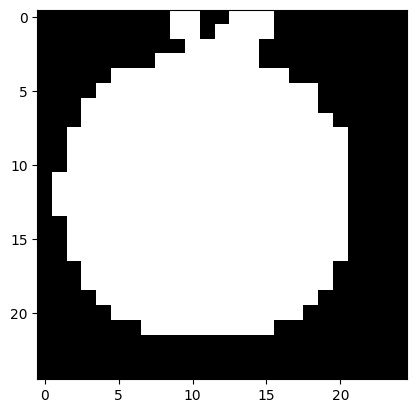

In [11]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# cargar la imagen binaria
img = Image.open("images/apple-1.png")

# convertir la imagen a una matriz numpy
img_array = np.array(img)

# definir el tamaño de las celdas cuadrangulares
cell_size = 10

# dividir la imagen en celdas cuadrangulares
cells = np.zeros((img_array.shape[0] // cell_size, img_array.shape[1] // cell_size))
for i in range(cells.shape[0]):
    for j in range(cells.shape[1]):
        cell = img_array[i*cell_size:(i+1)*cell_size, j*cell_size:(j+1)*cell_size]
        cells[i,j] = np.any(cell > 0)

# visualizar las celdas cuadrangulares
plt.imshow(cells, cmap="gray")
plt.show()



### Obtener el contorno de cada uno de los objetos binarios, considerando la vecindad-8

### Calcular el centro de masa (𝑥𝑐𝑚, 𝑦𝑐𝑚) de cada uno de los objetos binarios. Trasladar la imagen original a una posición diferente y calcular los momentos centrales para p,q = 0,1 y 2

### Para cada objeto, realizar una rotación* con un ángulo x, y calcular los tres primeros momentos de Hu, antes y después de la rotación 
#### 𝜑1 = 𝜇20 + 𝜇02
#### 𝜑2 = (𝜇20 − 𝜇02)^2 + 4𝜇11^2
#### 𝜑3 = (𝜇30 − 3𝜇12)^2 + (3𝜇21 − 𝜇03)^2

> *Nota: para rotar los objetos binarios, aplicar la matriz de rotación vista en clase. Usar interpolación bilineal o algún filtro para rellenar los huecos que hayan quedado al rotar


### Calcular los ejes principales de cada uno de los objetos y alinearlos en una misma dirección, por ejemplo, el eje Y

### Realizar una superposición entre cada pareja de objetos haciendo coincidir el centro de masa. En una tabla de 10 × 10 indicar el número de pixeles comunes (𝑃𝑐) y pixeles no comunes, 𝑃+ y 𝑃−, respectivamente, entre los 10 objetos. 

### Con el Algoritmo Húngaro, mover los pixeles 𝑃+ a los pixeles 𝑃− y realizar una tabla de las distancias mínimas obtenidas al comparar cada pareja de objetos.

### Analizar cada uno de los resultados y obtener conclusiones. En las conclusiones aclarar si las ecuaciones (1), (2) y (3) son invariantes ante dichas transformaciones y si el método de escalamiento, alineación por ejes principales y aplicación del Algoritmo Húngaro para mover los pixeles, es adecuado para dar una medida de similitud.